In [1]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv



--2024-04-06 04:35:31--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2024-04-06 04:35:31 (53.1 MB/s) - ‘iris.csv’ saved [3716/3716]



Loading the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv("iris.csv")

In [8]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Shape of the data

In [9]:
data.shape

(150, 5)

Coloumn name of dataset

In [10]:
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


How many values are there is setosa, virginica,versicolor

In [11]:
data["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In this code it shows the dataset is balanced because the three species have the same value

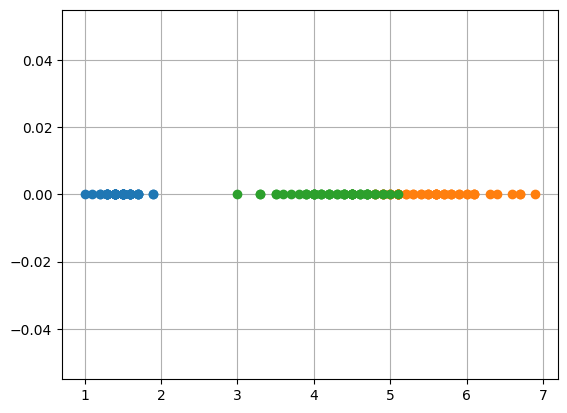

In [12]:
data_setosa = data.loc[data["species"]=="setosa"]
data_virgnica = data.loc[data["species"]=="virginica"]
data_versicolor = data.loc[data["species"]=="versicolor"]
plt.plot(data_setosa["petal_length"],np.zeros_like(data_setosa["petal_length"]),'o')
plt.plot(data_virgnica["petal_length"],np.zeros_like(data_virgnica["petal_length"]),'o')
plt.plot(data_versicolor["petal_length"],np.zeros_like(data_versicolor["petal_length"]),'o')
plt.grid()
plt.show()

2D

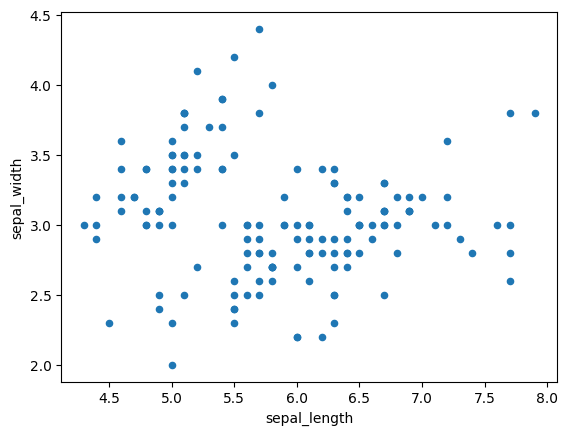

In [13]:
data.plot(kind="scatter",x="sepal_length",y="sepal_width")
plt.show()

Differentiating different species using diff colors

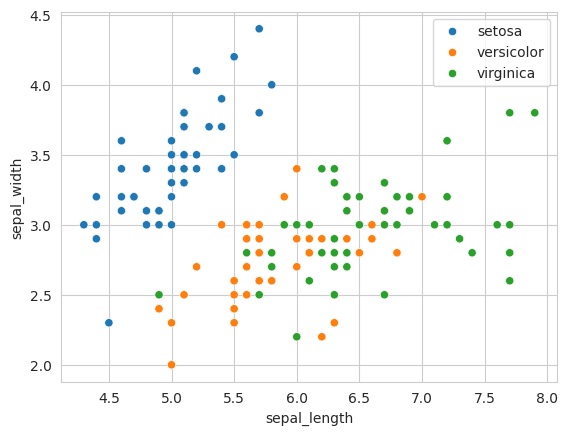

In [14]:

sns.set_style("whitegrid")
sns.scatterplot(data,x="sepal_length",y="sepal_width",hue="species")
plt.legend()
plt.show()

3-D

In [16]:
import plotly.express as px
fig = px.scatter_3d(data, x='sepal_length', y='sepal_width', z='petal_width',color='species')
fig.show()


Setosa can be easily separated by drawing a linear plane. Similarly, we can find out linear planes to separate other species. When 3 features are used, it is easier to separate the species than before.

Here we are using plotly library for plotting as you can see we have used sepal length on the x-axis, sepal width on the y-axis and petal length on the z-axis.

A 3D plot will be used for three variables or dimensions. However, what would do if we have more than 3 dimensions or features in our dataset as we humans do have the capability to visualize more than 3 dimensions? One solution to this problem is pair plots.

So, when we have only 3 variables, we can go for 3D-scatter plot. But 4 or more variables are better plotted using pair plots.

Pair Plots

A pairs plot allows us to see both distribution of single variables and relationships between two variables. \

For example, let’s say we have four features ‘sepal length’, ‘sepal width’, ‘petal length’ and ‘petal width’ in our iris dataset. In that case, we will have 4C2 plots i.e. 6 unique plots.

The pairs in this case will be :

sepal length, sepal width
sepal length, petal length
sepal length, petal width
sepal width, petal length
sepal width, petal width
petal length, petal width
So, here instead of trying to visualize four dimensions which is not possible. We will look into 6 2D plots and try to understand the 4-dimensional data in the form of a matrix.

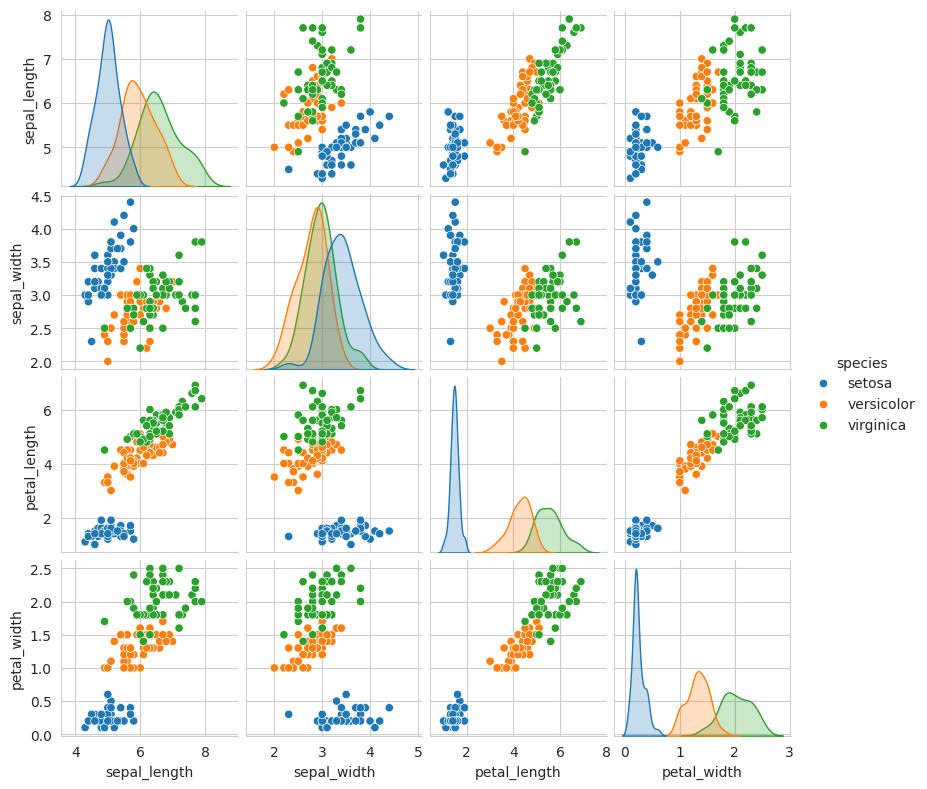

In [17]:
sns.set_style("whitegrid");
sns.pairplot(data,hue="species",height=2);
plt.show()

As Seen Above, The Pair Plots Can Be Divided Into Three Parts:

The diagonal plot which showcases the histogram. The histogram allows us to see the PDF/Probability distribution of a single variable
Upper triangle and lower triangle which shows us the scatter plot.
The scatter plots show us the relationship between the features. These upper and lower triangles are the mirror image of each other.
The diagonal plots are known as KDE or Kernel Density Estimation. Kernel Density Estimation (KDE) is an unsupervised learning technique that helps to estimate the PDF of a random variable in a non-parametric way. It's related to a histogram but with a data smoothing technique. PCA, SVM, or Kernel Density Estimation are classical machine learning techniques used to find abnormal observations. KDE gives the spread of each variables.

Pair plot will only plot the variables which are numerical.If the variables are of String type, by default pair plot won’t plot automatically.If you want to plot, then you need to encode it as numerical. However, Seaborn will encode internally and assign a label to each unique value in the non-numerical values.

Classification using if else

In [19]:
#classification considering petal length and petal width
pet_len=float(input("Enter Petal Length : "))
pet_wid=float(input("Enter Petal Width : "))
if (0.5<=pet_len<=2) and (0<pet_wid<=0.7):
  print("The Species is Setosa")
elif (2.5<=pet_len<=5.2) and (1<=pet_wid<=1.7):
  print("The Species is Versicolor")
elif (4.2<=pet_len<=7) and (1.3<=pet_wid<=2.5):
  print("The Species is Verginica")
else:
  print("Unexpected values for 'Iris'")

Enter Petal Length : 2.5
Enter Petal Width : 1.7
The Species is Versicolor


###Limitation of Pair plot:-
If you have d features, you will have a pair plot of size dxd cells where each cell is a plot between a pair of features.So, pair plots are hard to use when we have high dimensional data. For high dimensional data we can use PCA, t-SNE.


###Observations | Conclusions

* petal length and petal width are the most useful features to identify various flower types.
* While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable).
* We can find “lines” and “if-else” conditions to build a simple model to classify the flower types.

##Histogram and Introduction of PDF

A histogram is an accurate graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable).To construct a histogram, the first step is to `bin` the range of values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.


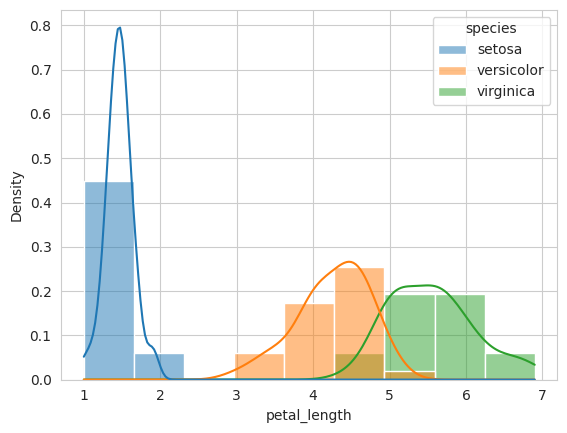

In [20]:
sns.histplot(data,x="petal_length",hue="species",kde=True,stat="density") # stat = density means probability density function is plotted
plt.show()

The spread of density of versicolor and verginica is overlapping.

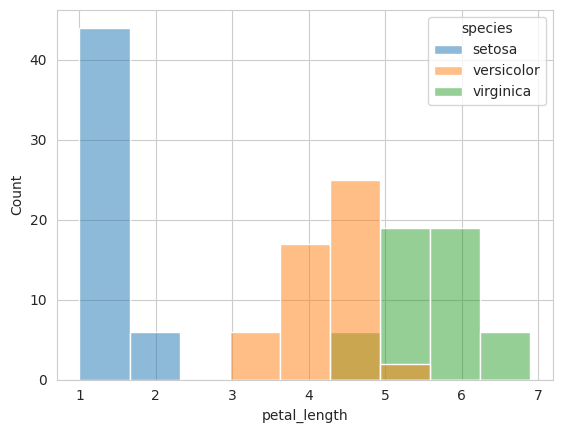

In [22]:
sns.histplot(data,x="petal_length",hue="species")
plt.show()

In each bin, we are getting the number of occurrences. For the bin size 1 to 1.7, the number of occurrence is 45.
The spread of each bin is bin size.

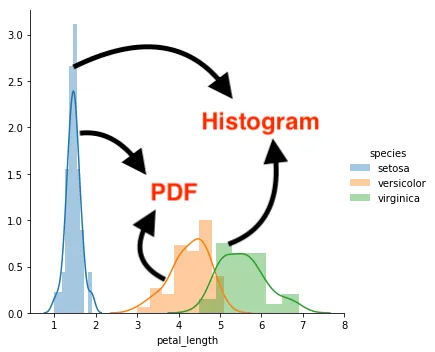

PDF is smoothness of histogram

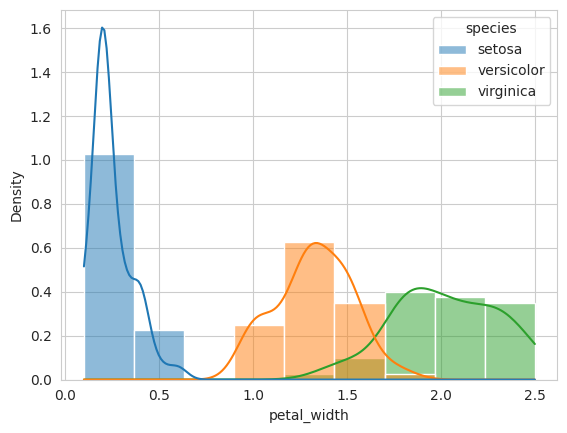

In [23]:
sns.histplot(data,x="petal_width",hue="species",kde=True,stat="density")
plt.show()

###Observation | Conclusion

* As we compare petal length and petal width then petal length, the species setosa is better separable using petal width.
* There is considerable overlap between versicolor and virginica.

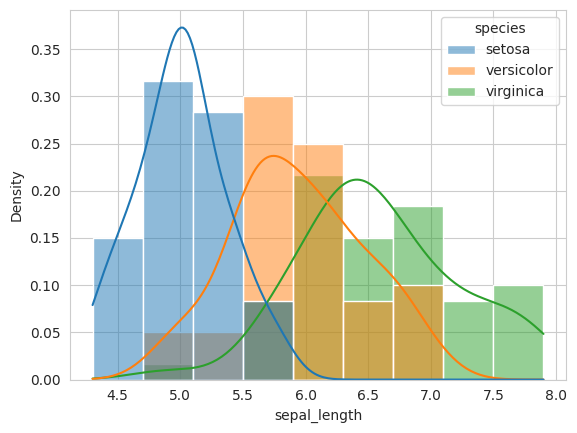

In [25]:
sns.histplot(data,x="sepal_length",hue="species",kde=True,stat="density")
plt.show()

###Observations | Conclusion

* Here we can’t separate any class because all of them are overlapped with each other.
* From above observations, we can say that separation using sepal length is difficult than petal length and petal width.

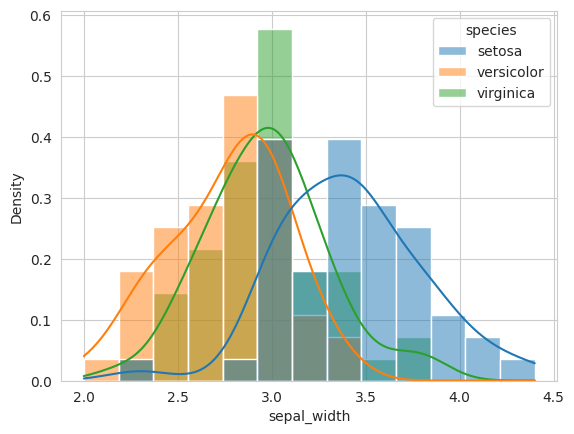

In [27]:
sns.histplot(data,x="sepal_width",hue="species",kde=True,stat="density")
plt.show()

###Observation | Conclusion

* Here virginica and versicolor are fully overlapped.
* Setosa is also heavily overlapped.


###Data Insights:
* The pdf curve of Iris Setosa ends roughly at 2.1
* If petal length < 2.1, then species is Iris Setosa
* The point of intersection between pdf curves of Versicolor and Virginica is roughly at 4.8
* If petal length > 2.1 and petal length < 4.8 then species is Iris Versicolor
* If petal length > 4.8 then species is Iris Virginica

#Calculating PDF Points
-probability density function

In [30]:
#filtering out the species separately-
iris_setosa = data.loc[data["species"] == "setosa"]
iris_virginica = data.loc[data["species"] == "virginica"]
iris_versicolor = data.loc[data["species"] == "versicolor"]
#We need to calculate pdf.We plot histogram since pdf is smoothening of histogram.
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, density = True)

In [31]:
np.histogram(iris_setosa['petal_length'], bins=10, density = True)#np.histogram is the  numpy method to find probability density function.
 #density=True gives pdf of each bin

(array([0.22222222, 0.22222222, 0.44444444, 1.55555556, 2.66666667,
        3.11111111, 1.55555556, 0.88888889, 0.        , 0.44444444]),
 array([1.  , 1.09, 1.18, 1.27, 1.36, 1.45, 1.54, 1.63, 1.72, 1.81, 1.9 ]))

When density=True, we get counts of density to find probability distribution of each bin.
The first array corresponds to 'counts' and the second one is 'bin edges'.

The petal length of setosa lies between 1 to 1.9, we get this from the dataset. We selected the number of bins as 10; ie 'bins=10'.
The bin size is since set as 0.09 , ie (1.9-1)/10.

So the counts between 1 and 1.09 is 0.222222222, the counts between 1.09 and 1.18 is 0.222222222,the counts between 1.18 and 1.27 is 0.44444444, the counts between 1.27 and 1.36 is 1.55555556 and so on.

Now, probability=counts/total

In [32]:
counts[0]

0.22222222222222204

In [33]:
counts[0]/sum(counts) #probability distribution function for the first bin edge.

0.019999999999999983

In [34]:
counts[1]/sum(counts) #probability distribution for the second bin edge.

0.02000000000000003

The counts for histogram :
 [0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]

Sum of counts is:
 11.11111111111111

The edges of bins :
 [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]

The PDF for each bin is :
 [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]


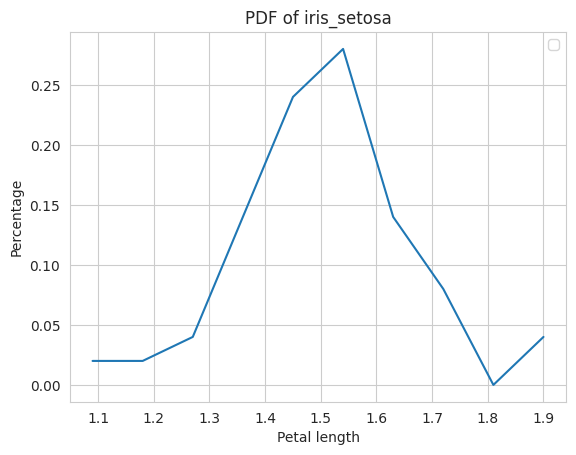

In [35]:
print("The counts for histogram :\n",counts)
pdf = counts/(sum(counts))
print("\nSum of counts is:\n",sum(counts))
print("\nThe edges of bins :\n",bin_edges)
print("\nThe PDF for each bin is :\n",pdf);

plt.gca().legend(('Pdf'))
plt.title('PDF of iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.plot(bin_edges[1:],pdf)#plots the PDF with the bin edges as the x-values and the corresponding PDF values as the y-values

#Calculating CDF Points


[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


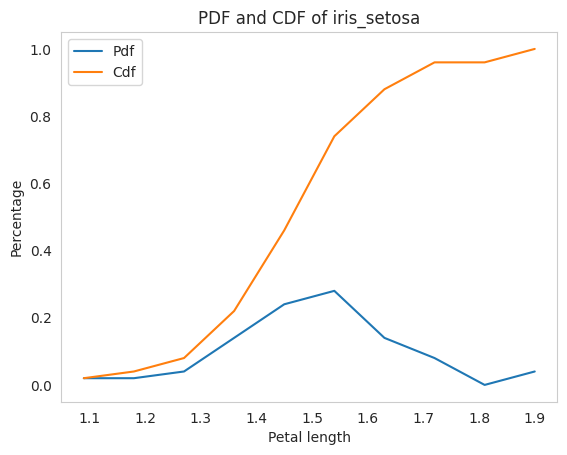

In [36]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)

print(counts)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('Pdf','Cdf'))
plt.title('PDF and CDF of iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.grid()
plt.show()

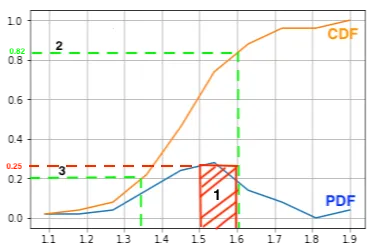

* 25% of point typically have their petal length between 1.5 and 1.6 called PDF
* There are 82% of setosa flower that have their petal length is less than 1.6(PL ≤ 1.6)
* There are 20% of setosa flower have their petal length is less than 1.3


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


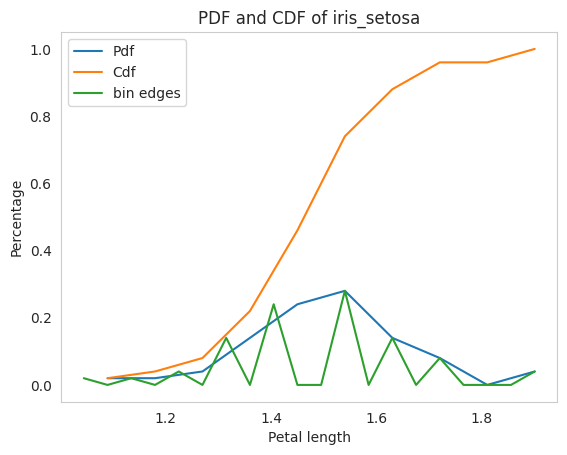

In [37]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20,
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.gca().legend(('Pdf','Cdf','bin edges'))
plt.grid()
plt.title('PDF and CDF of iris_setosa')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.show()



# PDF and CDF of all the species:

Iris Setosa:

pdf is  [0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
cdf is  [0.02 0.04 0.08 0.22 0.46 0.74 0.88 0.96 0.96 1.  ]


Iris Virginica:

pdf is  [0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
cdf is  [0.02 0.12 0.36 0.44 0.62 0.78 0.88 0.92 0.94 1.  ]


Iris Versicolor:

pdf is  [0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
cdf is  [0.02 0.06 0.12 0.16 0.32 0.46 0.58 0.78 0.92 1.  ]


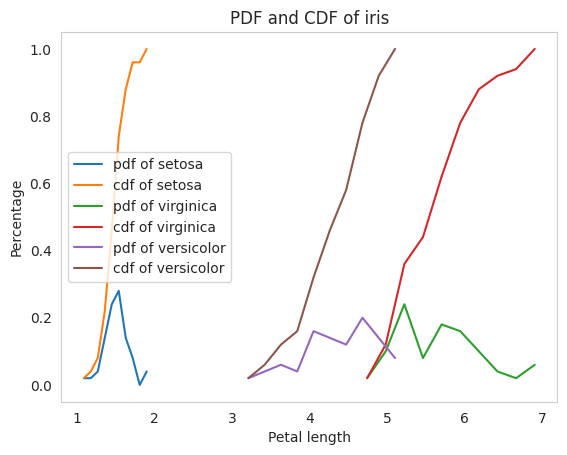

In [38]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print("Iris Setosa:\n")
print('pdf is ',pdf)
cdf = np.cumsum(pdf)
print('cdf is ',cdf)
plt.plot(bin_edges[1:],pdf,label='pdf of setosa')
plt.plot(bin_edges[1:], cdf,label='cdf of setosa')


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print("\n\nIris Virginica:\n")
print('pdf is ',pdf)
cdf = np.cumsum(pdf)
print('cdf is ',cdf)
plt.plot(bin_edges[1:],pdf,label='pdf of virginica')
plt.plot(bin_edges[1:], cdf,label='cdf of virginica')


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10,
                                 density = True)
pdf = counts/(sum(counts))
print("\n\nIris Versicolor:\n")
print('pdf is ',pdf)
cdf = np.cumsum(pdf)
print('cdf is ',cdf)
plt.plot(bin_edges[1:],pdf,label='pdf of versicolor')
plt.plot(bin_edges[1:], cdf,label='cdf of versicolor')

plt.title('PDF and CDF of iris')
plt.xlabel("Petal length")
plt.ylabel("Percentage")
plt.legend()
plt.grid()
plt.show()

#Mean, Variance, Std-deviation


In [39]:
#Mean, Variance, Std-deviation,
print("Mean:")
print('Setosa :',np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print('Setosa (with an outlier):',np.mean(np.append(iris_setosa["petal_length"],50)));
print('Virginica :',np.mean(iris_virginica["petal_length"]))
print('Versicolor :',np.mean(iris_versicolor["petal_length"]))

print("\nStandard deviation:");
print('Setosa :',np.std(iris_setosa["petal_length"]))
print('Virginica :',np.std(iris_virginica["petal_length"]))
print('Versicolor :',np.std(iris_versicolor["petal_length"]))

Mean:
Setosa : 1.464
Setosa (with an outlier): 2.4156862745098038
Virginica : 5.5520000000000005
Versicolor : 4.26

Standard deviation:
Setosa : 0.17176728442867112
Virginica : 0.546347874526844
Versicolor : 0.4651881339845203


# Median,Quantiles,Percentiles,IQR :

In [40]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedian:")
print('Setosa :',np.median(iris_setosa["petal_length"]))
#Median with an outlier
print('Setosa (with an outlier):',np.median(np.append(iris_setosa["petal_length"],50)));
print('Virginica :',np.median(iris_virginica["petal_length"]))
print('Versicolor :',np.median(iris_versicolor["petal_length"]))


print("\nQuantile:")
print('Setosa :',np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print('Virginica :',np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print('Versicolor :',np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentile:")
print('Setosa :',np.percentile(iris_setosa["petal_length"],90))
print('Virginica :',np.percentile(iris_virginica["petal_length"],90))
print('Versicolor :',np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print('Setosa :',robust.mad(iris_setosa["petal_length"]))
print('Virginica :',robust.mad(iris_virginica["petal_length"]))
print('Versicolor :',robust.mad(iris_versicolor["petal_length"]))



Median:
Setosa : 1.5
Setosa (with an outlier): 1.5
Virginica : 5.55
Versicolor : 4.35

Quantile:
Setosa : [1.    1.4   1.5   1.575]
Virginica : [4.5   5.1   5.55  5.875]
Versicolor : [3.   4.   4.35 4.6 ]

90th Percentile:
Setosa : 1.7
Virginica : 6.31
Versicolor : 4.8

Median Absolute Deviation
Setosa : 0.14826022185056031
Virginica : 0.6671709983275211
Versicolor : 0.5189107764769602


#Quantiles:-

Any set of data, arranged in ascending or descending order, can be divided into various parts, also known as partitions or subsets, regulated by quantiles. Quantile is a generic term for those values that divide the set into partitions of size n, so that each part represents 1/n of the set.

`x={5,6,9,11,13,20,26}`

* first quartile, or Q1 = 6
* second quartile, or Q2 = 11
* third quartile, or Q3 = 20

#Box-plot and whisker :


A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. It does not show a distribution in as much detail as a stem and leaf plot or histogram does, but is especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations i.e outliers in the data set.

Box-plot with whiskers is another method of visualising the 1-D scatter plot more intuitive

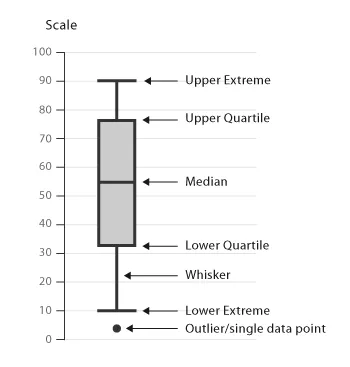


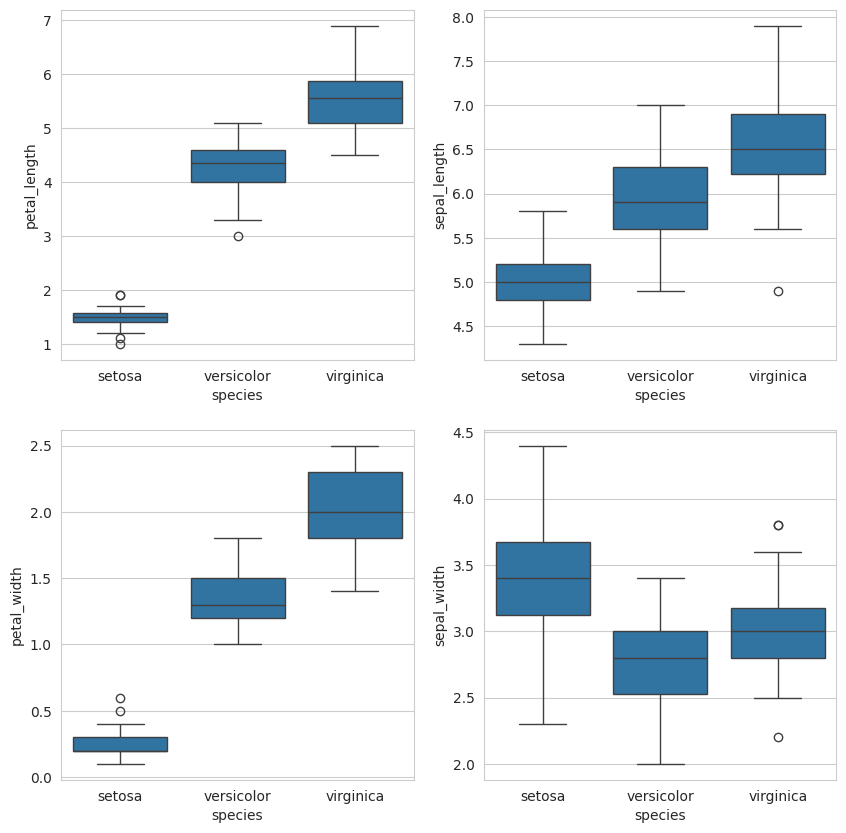

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(x="species",y="petal_length", data=data)
plt.subplot(222)
sns.boxplot(x="species",y="sepal_length", data=data)
plt.subplot(223)
sns.boxplot(x="species",y="petal_width", data=data)
plt.subplot(224)
sns.boxplot(x="species",y="sepal_width", data=data)
plt.show()